In [7]:
from sklearn import datasets

data = datasets.make_blobs(10, n_features=2, centers=2, random_state=10)
data

(array([[  6.04774884, -10.30504657],
        [  2.90159483,   5.42121526],
        [  4.1575017 ,   3.89627276],
        [  1.53636249,   5.11121453],
        [  3.88101257,  -9.59334486],
        [  1.70789903,   6.00435173],
        [  5.69192445,  -9.47641249],
        [  5.4307043 ,  -9.75956122],
        [  5.85943906,  -8.38192364],
        [  0.69523642,   3.23270535]]),
 array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1]))

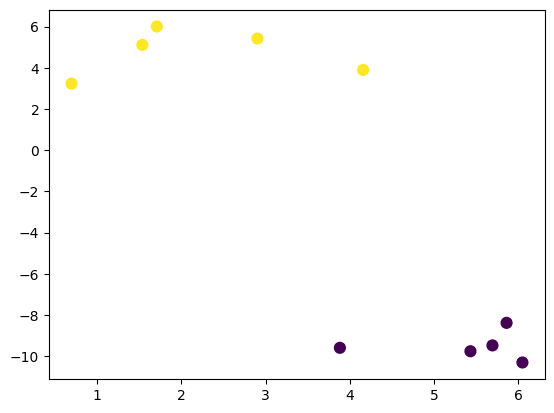

In [8]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], s=60)

In [9]:
import numpy as np

def euclidean_distance(a,b):
    x = float(a[0]) - float(b[0])
    y = float(a[1]) - float(b[1])
    return round(np.sqrt(x**2 + y**2), 2)

def agglomerative_clustering(data):
    while len(data) > 1:
        print("The {} iteration".format(10- len(data) + 1))
        min_distance = np.inf
        min_index = (0, 1)
        for i in range(len(data)):
            print("---")
            for j in range(i+1, len(data)):
                distance = euclidean_distance(data[i], data[j])
                print("Distance between {} and {}: {}".format(i, j, distance))
                if distance < min_distance:
                    min_distance = distance
                    min_index = (i, j)
        i,j = min_index
        data1 = data[i]
        data2 = data[j]
        data = np.delete(data, j, axis=0)
        data = np.delete(data, i, axis=0)
        b = np.atleast_2d([(data1[0] + data2[0])/2, (data1[1]+data2[1])/2])
        data = np.concatenate((data, b))
        print("Cluster {} and {} are merged, new centroid is {}".format(i, j, b))
        
        
    return data    


In [10]:
agglomerative_clustering(data[0]) 

The 1 iteration
---
Distance between 0 and 1: 16.04
Distance between 0 and 2: 14.33
Distance between 0 and 3: 16.06
Distance between 0 and 4: 2.28
Distance between 0 and 5: 16.88
Distance between 0 and 6: 0.9
Distance between 0 and 7: 0.82
Distance between 0 and 8: 1.93
Distance between 0 and 9: 14.56
---
Distance between 1 and 2: 1.98
Distance between 1 and 3: 1.4
Distance between 1 and 4: 15.05
Distance between 1 and 5: 1.33
Distance between 1 and 6: 15.16
Distance between 1 and 7: 15.39
Distance between 1 and 8: 14.12
Distance between 1 and 9: 3.11
---
Distance between 2 and 3: 2.89
Distance between 2 and 4: 13.49
Distance between 2 and 5: 3.23
Distance between 2 and 6: 13.46
Distance between 2 and 7: 13.72
Distance between 2 and 8: 12.4
Distance between 2 and 9: 3.53
---
Distance between 3 and 4: 14.89
Distance between 3 and 5: 0.91
Distance between 3 and 6: 15.17
Distance between 3 and 7: 15.37
Distance between 3 and 8: 14.17
Distance between 3 and 9: 2.06
---
Distance between 4 a

array([[ 3.40447914, -2.70986843]])

In [11]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="average")
model.fit_predict(data[0])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

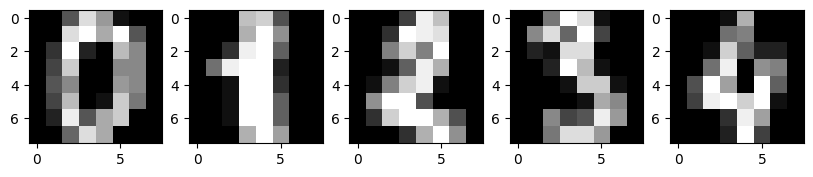

In [13]:
digits = datasets.load_digits()

fig,axes = plt.subplots(1,5,figsize=(10,5))
for i, image in enumerate(digits.images[:5]):
    axes[i].imshow(image, cmap='gray')


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(digits.data)
data


array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

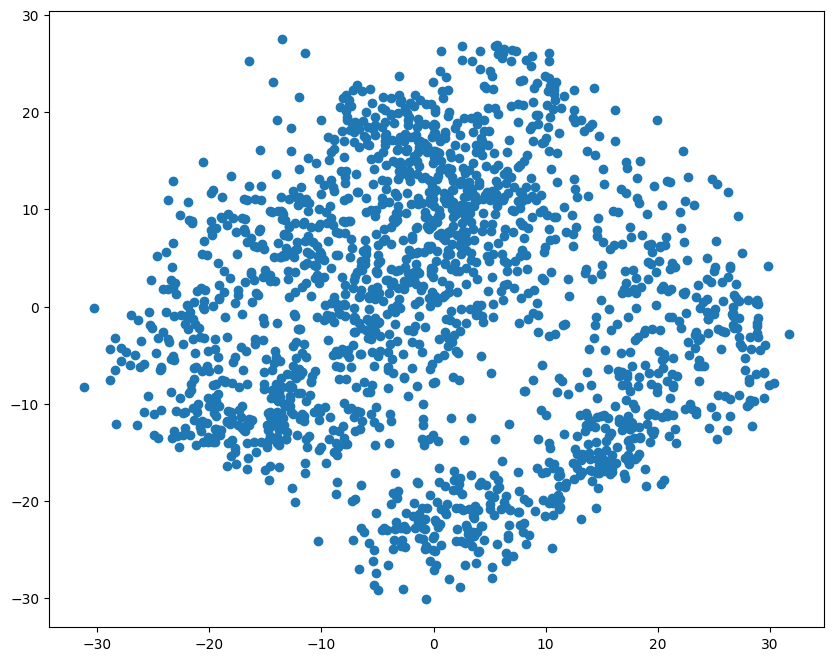

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(data[:, 0], data[:, 1])

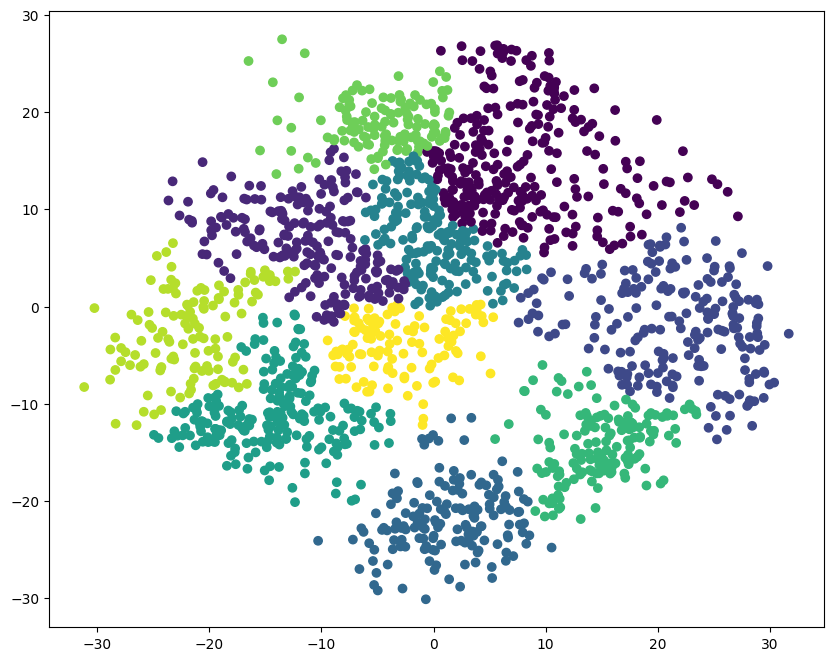

In [23]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=10)
cluster_pca = birch.fit_predict(data)
plt.figure(figsize=(10,8))
plt.scatter(data[:, 0], data[:, 1], c=cluster_pca)  

In [ ]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1